## Lab Session

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

### Load the dataset

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
cat = []
num = []
for i in df.columns:
  if df[i].dtypes=='object':
    cat.append(i)

  else:
    num.append(i)
    #print('The categorical variables are:\n',cat,'\n')
    #print('The numerical variables are:\n',num)


In [4]:
cat

['sex', 'smoker', 'day', 'time']

In [5]:
num

['total_bill', 'tip', 'size']

### 2. Compute the average bill amount for each day.

In [6]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [7]:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

Male customers are more generous in giving tips

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
df.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

Yes, more customers for dinner over lunch

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

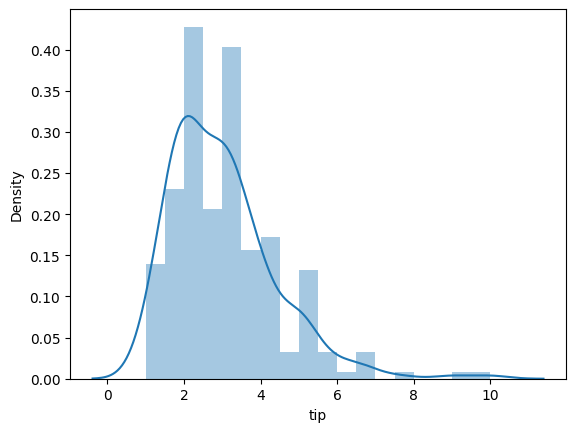

In [52]:
sns.distplot(df['tip']);

The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value as 1, mean values as 2.99, different percentile values and maximum values as 10. data is skwed towards right.

### 6. Find the busiest day in terms of the orders?

In [10]:
df.day.mode()

0    Sat
Name: day, dtype: object

using mode function we clearly can see SAT is the busiest day in terms of receiving orders.

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

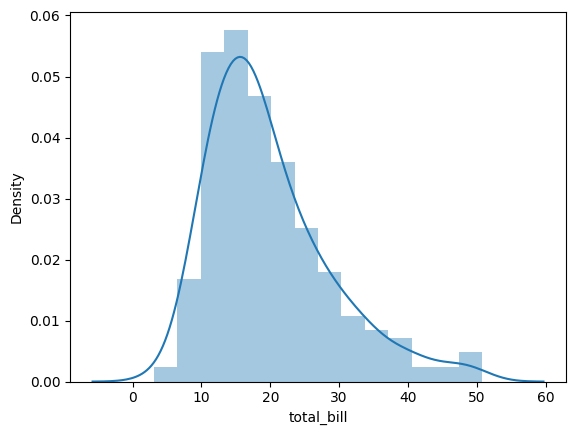

In [12]:
sns.distplot(df['total_bill']);

In [13]:
df['total_bill'].skew()

1.1332130376158205

As the plot clearly suggest that data is skewed towards the right, which might results in to outliers.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [14]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


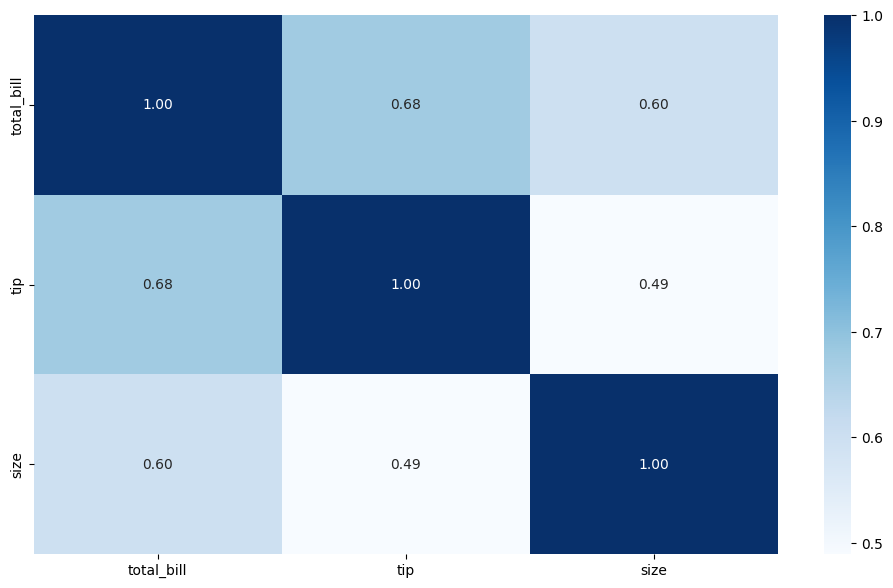

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues');

Yes it does depend on total bill amount. The more the bill and tip increases as well. heatmap plot also suggest that both total_bill and tip are highly coreletted.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

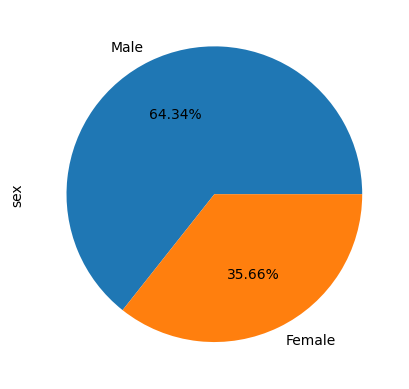

In [17]:
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%');

With piachat it is visible more male 64% over female 36%.

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [18]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

Smokers and non-smokers are present in both the genders. However, the non-smoking customers are more on both Male and Female categories.

### 11. Compute the average tip amount given for different days and display it in the plot.

In [19]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

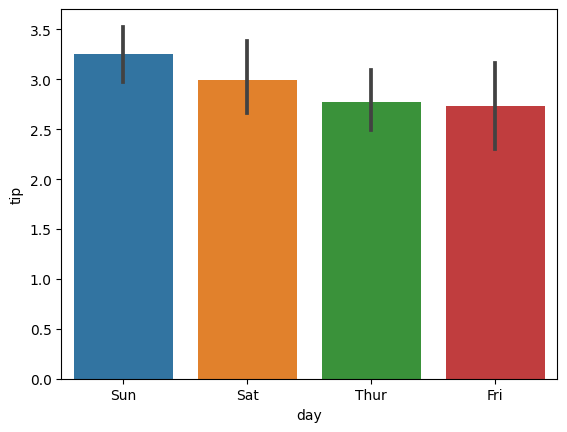

In [20]:
sns.barplot(x='day',y='tip',data=df)
plt.show()

On Sundays tip amount is higher followed by SATs.

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

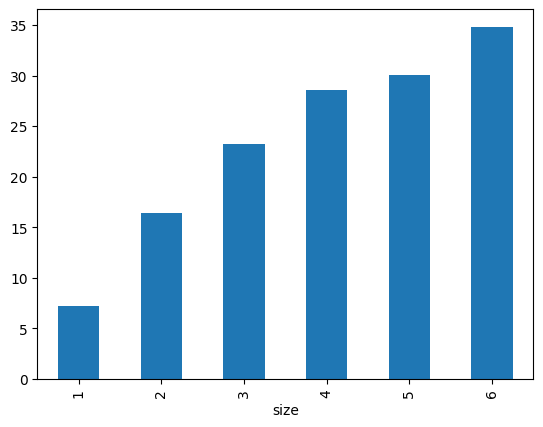

In [21]:
df.groupby('size')['total_bill'].mean().plot(kind='bar');

It clearly displays that more the customer and more tip.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

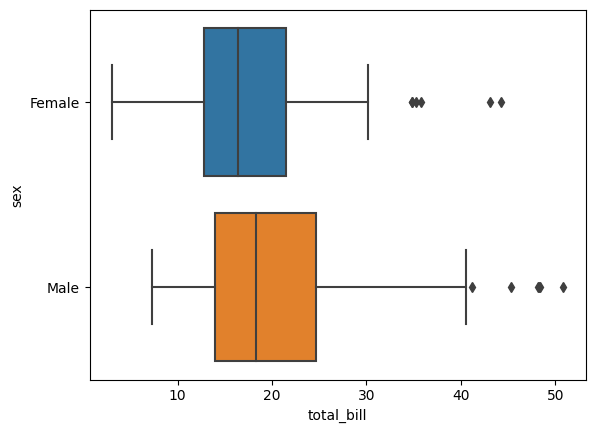

In [22]:
sns.boxplot(x='total_bill',y='sex',data=df);

Bill amount is more for Male customers

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [23]:
df.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

Using MAX function with groupby method we can see maximum amount on Saturdays followed by Sundays.

### 15. Compute the percentage of missing values in the dataset.

In [24]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No Missing values

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [25]:
len(df[df.duplicated()])

1

Yes there is one duplicated value present in to dataset

In [26]:
#dropping duplicate value as instructed
df.drop_duplicates(inplace=True)

In [37]:
len(df[df.duplicated()])

0

now there are no duplicated values present

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

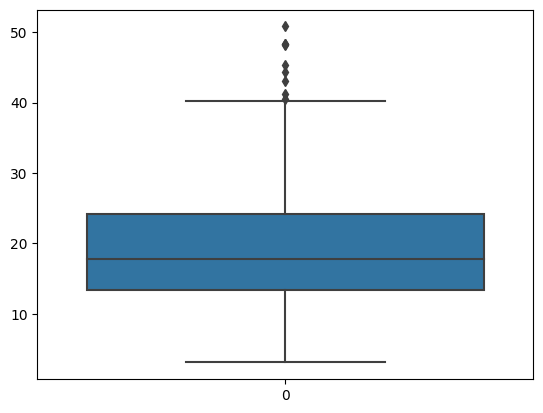

In [27]:
#checking outliers in to column total_bill
sns.boxplot(df['total_bill']);

There are outliers present in to the variable total_bill. Will treat them with transformation approach as instructed.

In [28]:
#treating outliers with log transformation
df['total_bill_trans']= np.log(df['total_bill'])

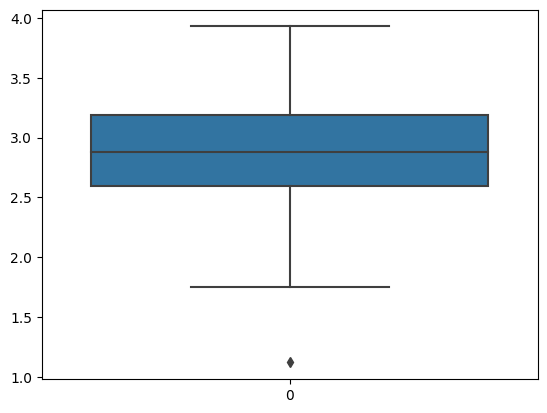

In [30]:
#boxplot after using log transformation
sns.boxplot(df['total_bill_trans']);

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

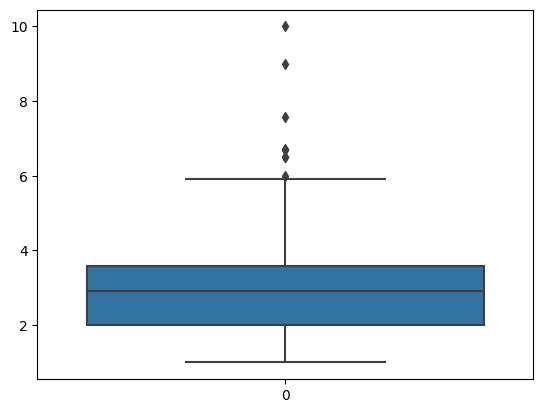

In [31]:
#checking outliers in to column tip
sns.boxplot(df['tip']);

Yes outliers are present in variable 'tip', will treat the using IQR method.

In [32]:
#outliers treatment using IQR method
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR= Q3-Q1

lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)

In [33]:
df_out = df.loc[(df['tip']< upper_whisker) & (df['tip']> lower_whisker)]

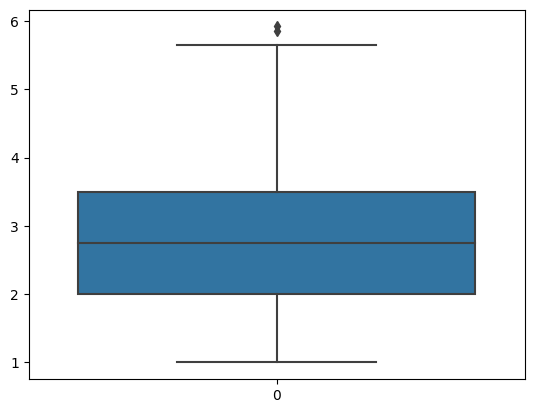

In [34]:
#boxplot after treating outliers using IQR method
sns.boxplot(df_out['tip']);

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [35]:
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
223,15.98,3.00,3,2.771338,0,0,0,0,0,1
134,18.26,3.25,2,2.904713,0,0,0,0,1,1
192,28.44,2.56,2,3.347797,1,1,0,0,1,1
226,10.09,2.00,2,2.311545,0,1,0,0,0,1
230,24.01,2.00,4,3.178470,1,1,1,0,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [36]:
total_bill_max = df['total_bill'].max()
total_bill_min = df['total_bill'].min()
range = total_bill_max-total_bill_min

print(range)

47.74


In [39]:
#initializing mimmaxscaler
minmax = MinMaxScaler()

In [40]:
#normalizing the values of total_bill to make the range 1.
df['total_bill_minmax'] = minmax.fit_transform(df[['total_bill']])

In [41]:
#checking the range after normalisation
total_bill_minmax_max = df['total_bill_minmax'].max()
total_bill_minmax_min = df['total_bill_minmax'].min()
range = total_bill_minmax_max- total_bill_minmax_min

print( range)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [42]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [43]:
#encoding categorical variables
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0


In [44]:
#storing the target column in Y variable and the rest of them in to X variables.
x = tips_df.drop('tip',axis=1)
y= tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [48]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
##scaling the data using min max scaling
mm = MinMaxScaler()

x_train.iloc[:,:2] = mm.fit_transform(x_train.iloc[:,:2])
x_test.iloc[:,:2] = mm.transform(x_test.iloc[:,:2])


(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [49]:
#fitting a linear regression model on to the train data
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
#Making predictions on the test data
pred= lr.predict(x_test)

In [51]:
#computing r2_score
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.2703130185107022


### Happy Learning:)